In [1]:
import zipfile

from IPython.display import display

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

In [2]:
def extract_zip_data(zf):
    '''Takes a zip file_name/path as a parameter and returns
    a list of dictionerys/tuples with file name and its ZipInfo file object
    
    :params: string, a  zip file name or path(preferably absolute)'''
    
    zip_o = zipfile.ZipFile(zf)
    
    return list(zip(zip_o.namelist(),[zip_o.open(i) for i in zip_o.infolist()])) #list of tuples of name,zipinfo file objects

In [3]:
def image_text(img):
    
    
    ''' Takes a PIL.Image object as an agrument and returns a string which is the text on the screen'''
    
    
    image1 = img.convert(mode = '1') #binarize the image
    
    
    text = pytesseract.image_to_string(image1) #takes alot of time!
    
    
    return text

In [4]:
#zip_data = extract_zip_data('small_img.zip')
#print(zip_data)

In [2]:
def face_bounding_boxes(img):
    
    
    
    img2 = img.resize((1000,int(1000*img.size[1]/img.size[0]))) # Resize the image due to
                                                                # kernel shutdown
    
    cv_img = np.array(img2)
    
    cv_img = cv.cvtColor(cv_img,cv.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(cv_img,1.15)
    
    try:
        
        return faces.tolist()
    except:
        return [[]]
    
    

In [6]:
def ZipImage_data(zip_file):
    
    
    '''Takes in a zip file of images and gives back a list of dictionery
    with the corresponding PIL.image object name, text in the image and bounding boxes for faces
    
    :param: zipfile'''
    
    image_dict_list = list() # to be returned
    
    
    Zip_Datas = extract_zip_data(zip_file) # a dictionery with names and corresponding ZipInfo objects
    
    
    for name,file in Zip_Datas:
        image_dict = dict()
        image_dict['image'] = Image.open(file)
        image_dict['text'] = image_text(image_dict['image'])
        image_dict['name'] = name
        image_dict['face_boxes'] = face_bounding_boxes(image_dict['image'])
        image_dict_list.append(image_dict)
    return image_dict_list
        
        

In [8]:
main_dict1 = ZipImage_data('small_img.zip')

In [61]:
main_dict_list1 = main_dict1[:]


s = 'Christopher'

In [7]:
main_dict10 = ZipImage_data('readonly/images.zip')

In [10]:
def findstring(strf,dict1):
    
    for sdict in dict1:
        
    
        sdict['found'] = strf in sdict['text']
    
    return dict1
    
    

In [11]:
def rsheet(dict1):
    
    x=0
    y=0
    
    if dict1['found'] == True:
        img = dict1['image']
        img1 = img.resize((1000,int(1000*img.size[1]/img.size[0])))
        sheet = Image.new('RGB',(400,200), color = 'Black')
        try:
            for face in dict1['face_boxes']:
                img2 = img1.crop((face[0],face[1],face[2]+face[0],face[3]+face[1]))
                sheet.paste(img2,(x,y))
                if x+img2.width<400:
                    x+=img2.width
                else:
                    x=0
                    y += 100
                if y>100:
                    break
                #print(x,y)
        
        except:
            sheet2 = Image.new('RGB', (1000,5))
            return (sheet2,False)
        sheet1 = sheet.resize((1000,400))
                             
        return (sheet1,True)
    return None
            


In [17]:
def c_image(im1,name,boxheight = 75):
    '''Takes 1 image object and 1 string as param
    Returns an image object with black box, mentioning the channel no.
    and intensity'''
    
    from PIL import ImageFont,ImageDraw
    
    font1 = ImageFont.truetype("readonly/fanwood-webfont.ttf", 50)

    
    image_sheet = Image.new('RGB',(im1[0].width,im1[0].height+75), color = 'white') 
    
    image_draw = ImageDraw.Draw(image_sheet,"RGB")
    
    image_sheet.paste(im1[0],(0,75))
    if im1[1]:
        image_draw.text((0,0),"Results found in file {}".format(name),fill = 'black',font = font1, anchor = "la")
    else :
        image_draw.text((0,0),"Results found in file{} but no images".format(name),font = font1, anchor = 'la')
    return image_sheet

In [173]:
new_dict = findstring(s, main_dict_list1)
new_dict[0]['found']

True

In [8]:
main_dict_list10 = main_dict10

a-0.png


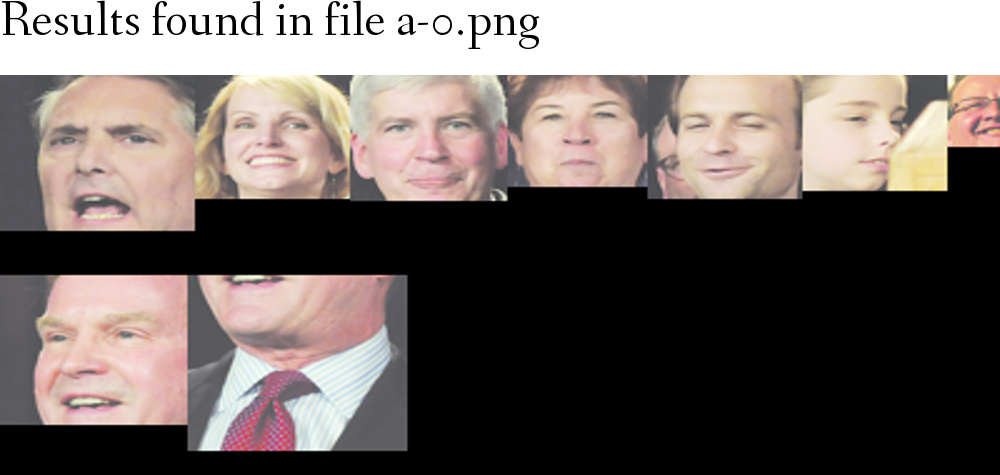

a-3.png


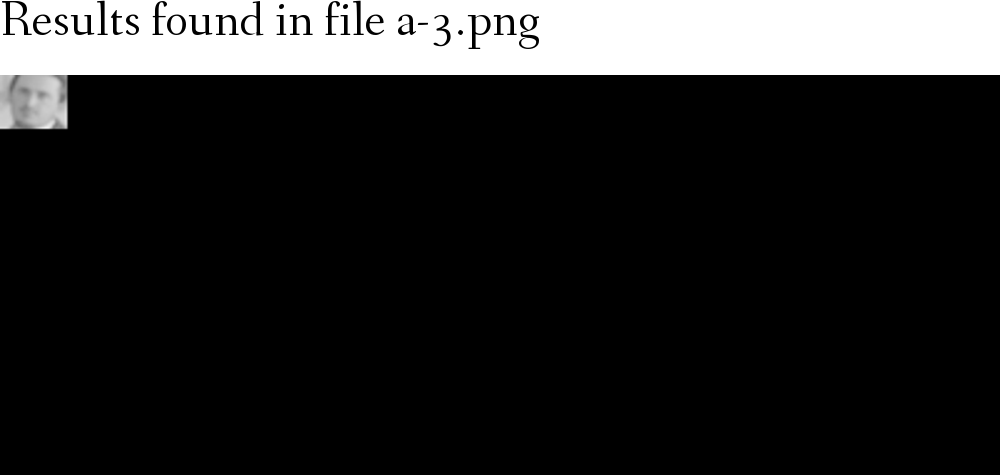

In [174]:
for d in new_dict:
    sheet1 = rsheet(d)
    if sheet1!= None:
        sheet1 = c_image(sheet1,d['name'])
        print(d['name'])
        display(sheet1)
    

In [13]:
s2 = 'Mark'
new_dict2 = findstring(s2, main_dict_list10)
print(list(d['found'] for d in new_dict2 ))



[True, True, True, False, False, True, True, True, False, False, False, False, True, False]


a-0.png


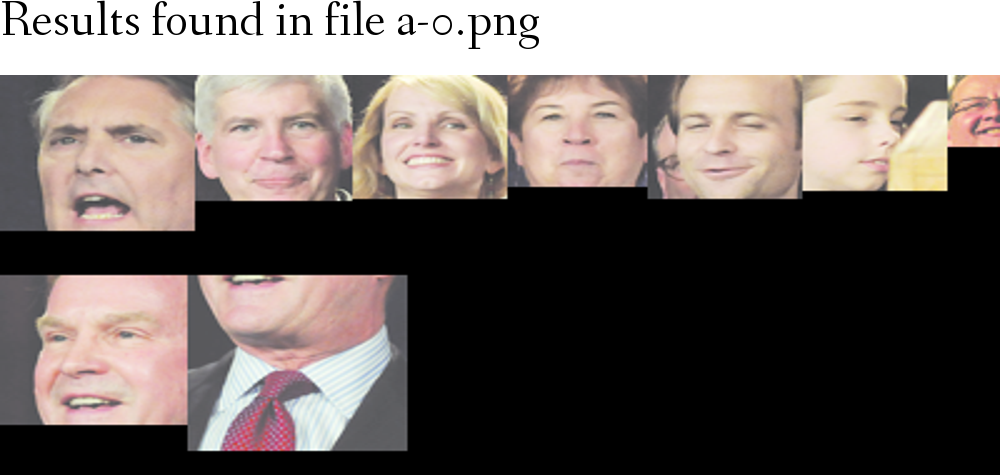

a-1.png


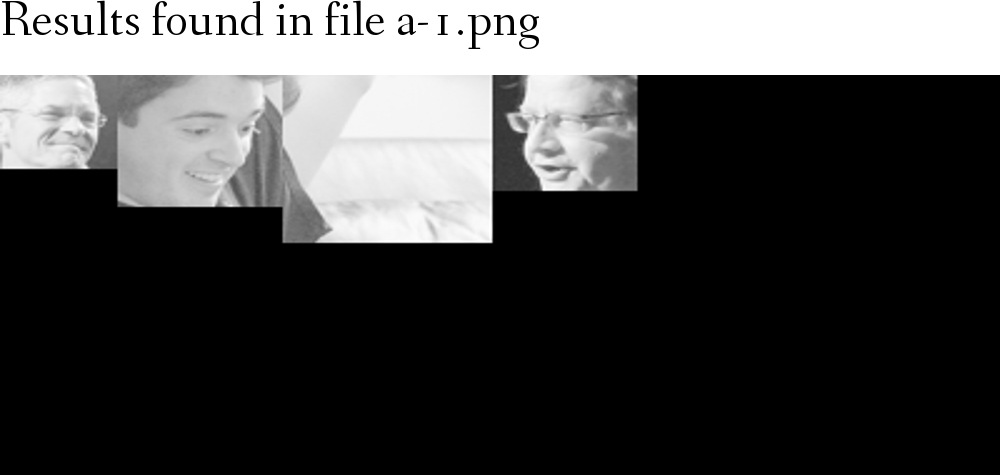

a-10.png


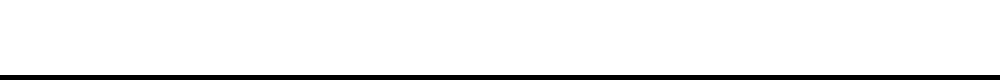

a-13.png


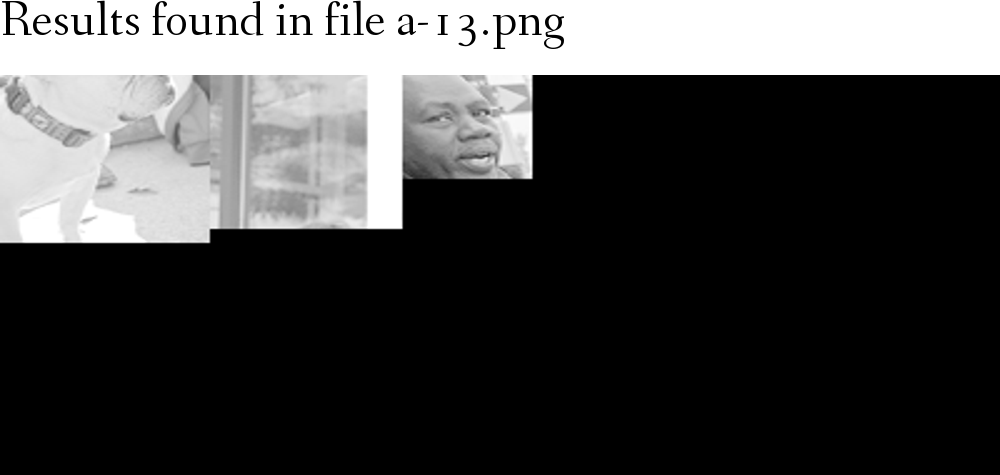

a-2.png


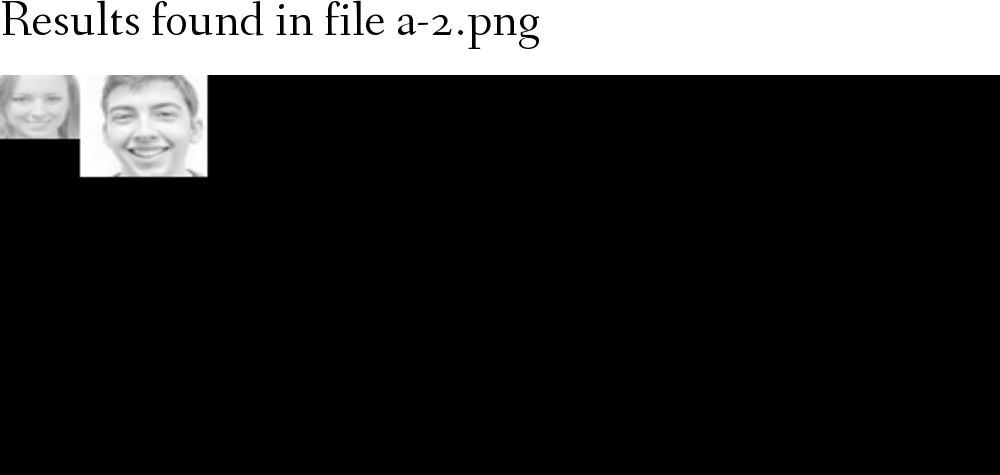

a-3.png


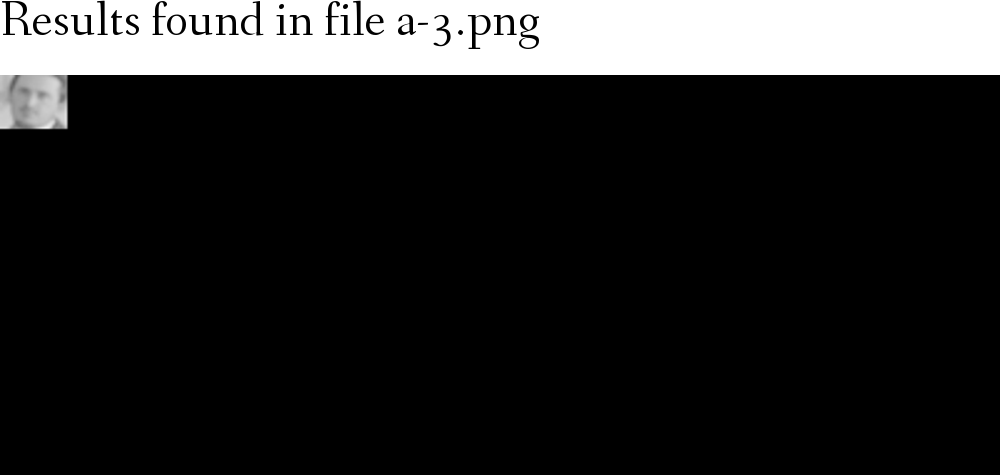

a-8.png


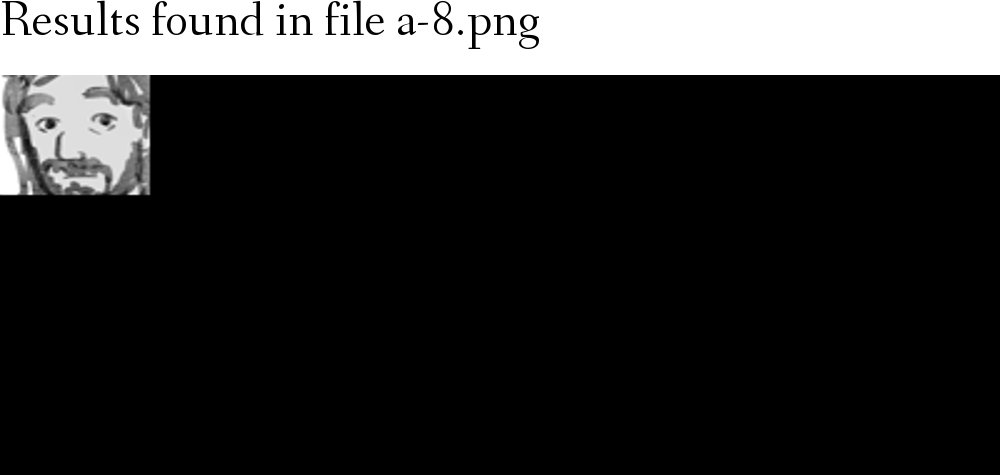

In [18]:
for d in new_dict2:
    sheet2 = rsheet(d)
    if sheet2!= None:
        sheet2 = c_image(sheet2,d['name'])
        print(d['name'])
        display(sheet2)
    

In [ ]:
image = Image.open("C:/users/aryan/desktop/Pyen/readonly/msi_recruitment.gif")
x = face_bounding_boxes(img)
print(x)